# Example of using the `Streetscape` class

This oultines the expected API.

In [1]:
import warnings

import geopandas as gpd
import numpy as np
import rioxarray
import pandas as pd
import matplotlib.pyplot as plt

from streetscape import Streetscape

You can skip this but these warnings are annoying on macOS and mean nothing.

In [2]:
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in intersection",
)

Read all the data. Only streets and buildings are required.

In [3]:
streets = gpd.read_file("bubenec.gpkg", layer="streets").to_crs(5514)
buildings = gpd.read_file("bubenec.gpkg", layer="buildings").to_crs(5514)
plots = gpd.read_file("bubenec.gpkg", layer="plots").to_crs(5514)
dtm = rioxarray.open_rasterio("bubenec.tif")

Mimic data on building category and height.

In [4]:
buildings["category"] = np.random.randint(0, 6, len(buildings))
buildings["height"] = np.random.randint(12, 30, len(buildings))

Initiate the class. This will dricectly compute builk of the sightline indicators based on streets and buildings.

In [5]:
sc = Streetscape(streets, buildings, category_col="category", height_col="height")

If you have plots and DTM, you can use two additional methods to compute additional variables.

In [6]:
sc.compute_plots(plots)
sc.compute_slope(dtm)

The resulting data can be extracted either on a street level:

In [7]:
street_df = sc.street_level()
street_df.head()

,N,n_l,n_r,left_OS,right_OS,OS,left_OS_STD,right_OS_STD,OS_STD,left_OS_MAD,...,building_prevalence[1],building_prevalence[2],building_prevalence[3],building_prevalence[4],building_prevalence[5],slope_degree,slope_percent,n_slopes,slope_valid,geometry
street_index,,,,,,,,,,,,,,,,,,,,,
0,57,28,38,33.607135,38.163914,71.771049,14.794107,12.059253,13.436283,13.873261,...,0.090909,0.242424,0.287879,0.151515,0.090909,2.809318,0.049073,57,True,"LINESTRING (-743681.992 -1040957.169, -743809...."
1,22,0,19,50.000000,17.497487,67.497487,0.000000,14.015687,9.794670,0.000000,...,0.000000,0.000000,0.631579,0.000000,0.368421,0.166605,0.002908,22,True,"LINESTRING (-743916.081 -1041162.952, -743899...."
2,43,36,21,13.907200,35.792031,49.699231,16.207022,15.188099,15.613165,11.913767,...,0.315789,0.052632,0.070175,0.228070,0.333333,1.122029,0.019587,43,True,"LINESTRING (-743689.806 -1041115.822, -743698...."
3,24,0,0,50.000000,48.865531,98.865531,0.000000,4.101247,2.869002,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.735747,0.047794,24,True,"LINESTRING (-743618.342 -1040934.607, -743621...."
4,15,0,0,50.000000,50.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.505840,0.026294,15,True,"LINESTRING (-743701.515 -1040870.813, -743693...."


It is a GeoDataFrame, so you can directly plot it.

<Axes: >

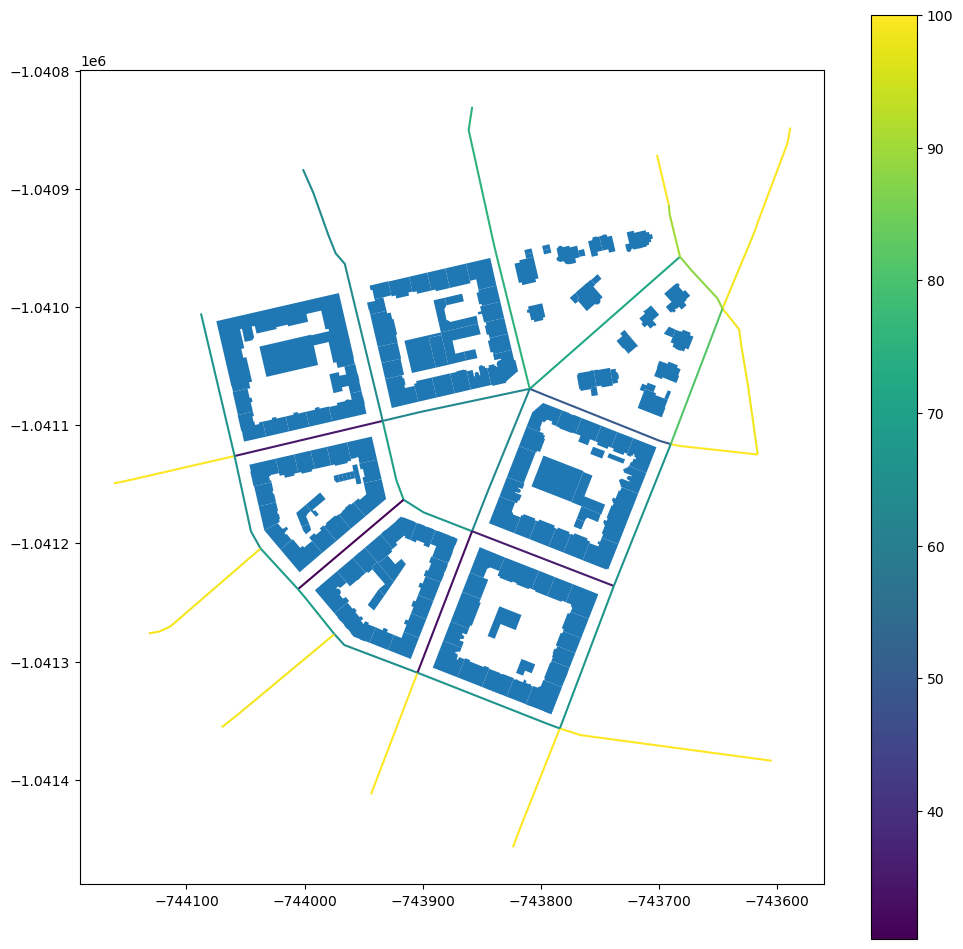

In [22]:
ax = street_df.plot("OS", figsize=(12, 12), legend=True)
buildings.plot(ax=ax)

Or for all individual sightline points.

In [8]:
point_df = sc.point_level()
point_df.head()

,geometry,left_OS_count,left_OS,left_SB_count,left_SB,left_H,left_HW,left_BUILT_COVERAGE,right_OS_count,right_OS,right_SB_count,right_SB,right_H,right_HW,right_BUILT_COVERAGE,front_SB,back_SB
street_index,,,,,,,,,,,,,,,,,
0,POINT (-743682.367 -1040957.5),1,50.0,0,NaN,NaN,NaN,0.0,1,50.000000,0,NaN,NaN,NaN,0.000000,300.0,300.0
0,POINT (-743684.627 -1040959.485),1,50.0,0,NaN,NaN,NaN,0.0,1,50.000000,0,NaN,NaN,NaN,0.000000,300.0,300.0
0,POINT (-743686.886 -1040961.471),1,50.0,0,NaN,NaN,NaN,0.0,1,27.593446,1,27.593446,18.0,0.652329,4.983602,300.0,300.0
0,POINT (-743689.145 -1040963.457),1,50.0,0,NaN,NaN,NaN,0.0,1,26.229691,1,26.229691,18.0,0.686245,11.208418,300.0,300.0
0,POINT (-743691.405 -1040965.443),1,50.0,0,NaN,NaN,NaN,0.0,1,25.412462,1,25.412462,18.0,0.708314,13.650682,300.0,300.0


Again, it is a GeoDataFrame, this time with point geometry.

<Axes: >

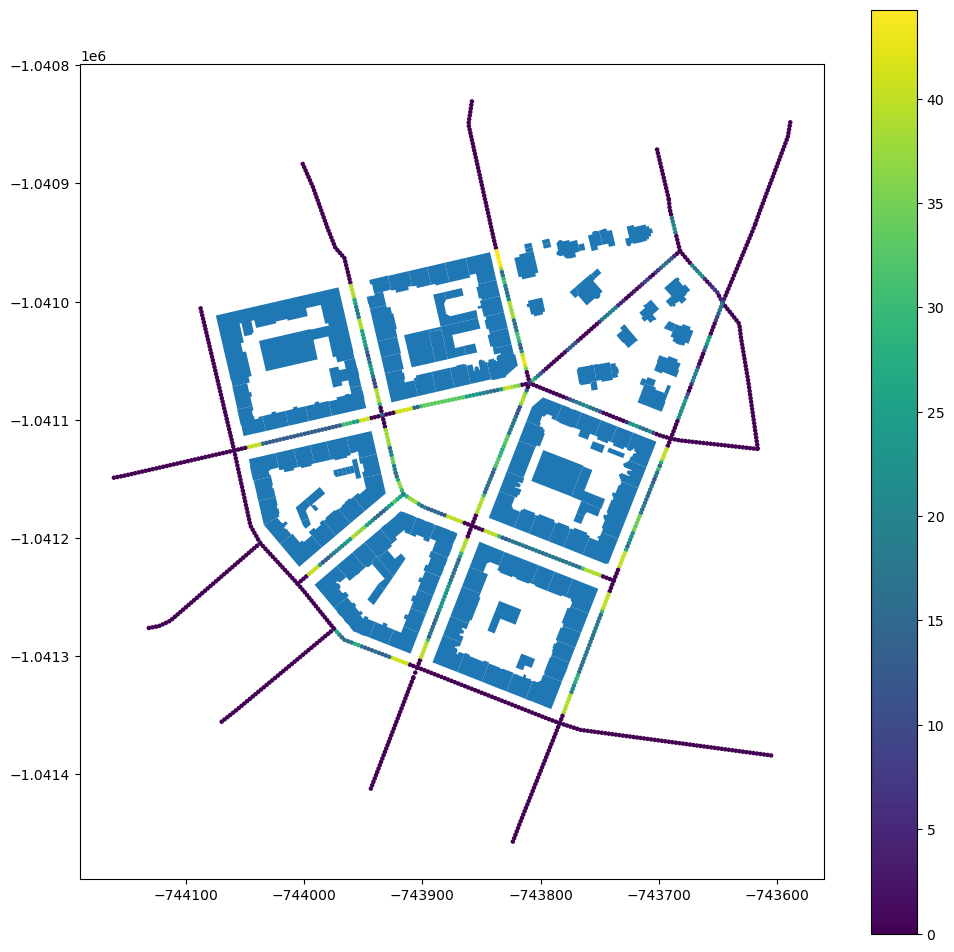

In [19]:
ax = point_df.plot("right_BUILT_COVERAGE", figsize=(12, 12), legend=True, markersize=5)
buildings.plot(ax=ax)